----------------------------------

# Visão Geral

- Leitura: 30 min

### Requisitos:
- Conhecimentos básicos da linguagem Python
- Conhecimentos básicos em Notebook Jupyter

### Conteúdo:
1. Binarização com limiar
---------------------------

### 1. Binarização com limiar

A binarização com limiar ou como também é chamada limiarização,é um tipo de segmentação de imagens, que transforma uma imagem colorida ou em tons de cins em uma imagem binária, ou simplesmente, preto e branco. 

A limiarização frequentemente é utilizada para selecionar áreas de interesse de uma imagem (segmentação do objeto de interesse), ignorando as partes com as quais não estamos interessados. 

### 1.1 Limiarização simples

A Limiarização simples consiste em alterar os pixls de uma imagme a partir de um valor de corte (limiar) atribuindo o valor preto para valores abaixo do limiar e branco para valores acima do limiar, ou vice-versa.

A biblioteca OpenCV disponibiliza a função *threshold* para realizar tal processo.

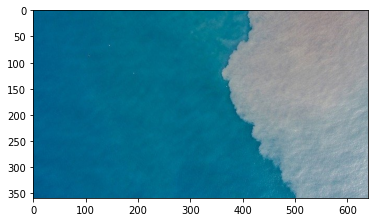

In [1]:
### importação da biblioteca opencv e matplotlib
import cv2
import matplotlib.pyplot as plt

# abrindo a imagem
imagem = cv2.imread('../../figures/oceano.jpg')
# converte imagem para o modelo de cor RGB
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# mostrando a imagem colorida
plt.imshow(imagem)

Vamos realizar a limiarização da imagem oceano.jpg com a função *threshold* do OpenCV.

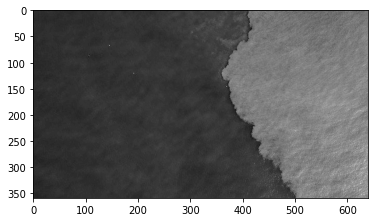

In [2]:
# converte imagem para tons de cinza
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# mostrando a imagem em tons de cinza
plt.imshow(imagem, cmap="gray")

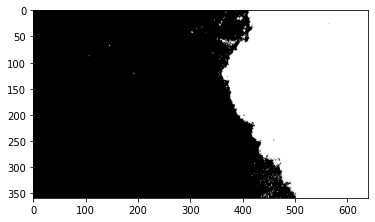

In [3]:
# limiarizando a imagem com o valor de corte igual 127
ret, imagem_binarizada = cv2.threshold(imagem,127,255,cv2.THRESH_BINARY)
# mostrando a imagem binarizada
plt.imshow(imagem_binarizada, cmap="gray")

Uma boa forma de escolher o valor do limiar é observando o histrograma da imagem. E assim, escolhendo um valor que esteja no vale entre os dois maiores picos de frequência de pixels, separando a espuma da água. Observando o histograma abaixo o valor 127 se encontra entre os dois picos separando o mar da espuma como observamos na figura binarizada.

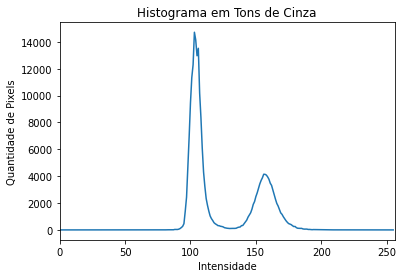

In [4]:
# importação da biblioteca Numpy
import numpy as np

# criando o histograma da imagem em tons de cinza
h2, b = np.histogram(imagem, bins=256, range=(0, 256))

# criando o gráfico do histograma
plt.figure()
plt.title("Histograma em Tons de Cinza")
plt.xlabel("Intensidade")
plt.ylabel("Quantidade de Pixels")
plt.plot(h2)
plt.xlim([0, 256])
plt.show()

#### 1.2 Limiar automático

O limiar automático selecionar o limiar entre os dois picos de forma automática. 

O método mais popular para realizar está tarefa é o algoritmo de Otsu.


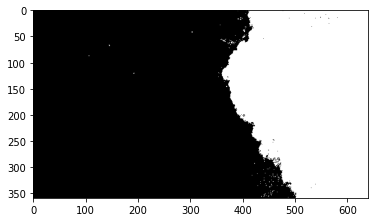

In [5]:
# gerando a imagem binarizada com limiar adaptativo
ret,imagem_binarizada = cv2.threshold(imagem,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# mostrando a imagem binarizada
plt.imshow(imagem_binarizada, cmap="gray")

In [6]:
# limiar encontrado pelo algoritmo de Otsu
print(ret)

131.0


# Apoio

Universidade Tecnólogica Federal do Paraná - UTFPR

# Referências

- Documentação do OpenCV-Python-Tutoriais - Thresholding(https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

- Lições da Data Carpentry - Thresholding (https://datacarpentry.org/image-processing/07-thresholding/index.html)

- Antonello, R. (2014). Introdução a Visão Computacional com Python e OpenCV. Engenharia de Controle e Automação do Instituto Federal Catarinense–IFC, campus Luzerna.

- Todas imagens usadas neste projeto foram obtidas do site pixabay.com com licença de domínio público ou foram obtidas das referências descritas nas lições.